In [1]:
import numpy as np
import tensorflow_datasets as tfds
import tensorflow as tf
tfds.disable_progress_bar()
import collections
import pathlib
import re
import string
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras import utils
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
import matplotlib.pyplot as plt
import tensorflow_text as tf_text
from tensorflow import keras

In [2]:
tfds.disable_progress_bar()

def plot_graphs(history, metric):   #define a function to plot the history graph with accuracy and loss
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

In [3]:
#batch_size = 32
seed = 42 #set seed

train_dataset = preprocessing.text_dataset_from_directory( #separate the dataset to training dataset and test dataset
    'bbcsport',
#    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=seed)

Found 737 files belonging to 5 classes.
Using 590 files for training.


In [4]:
test_dataset = preprocessing.text_dataset_from_directory(
    'bbcsport',
#    batch_size=batch_size,
    validation_split=.2,
    subset='validation',
    seed=seed)

Found 737 files belonging to 5 classes.
Using 147 files for validation.


In [5]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/Wiki-words-500-with-normalization/2")


In [7]:
hub_layer = hub.KerasLayer(embed, input_shape=[], dtype=tf.string)


In [10]:
model = tf.keras.Sequential([
    hub_layer,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [12]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])
earlystopping_cb = keras.callbacks.EarlyStopping (patience=10, restore_best_weights=True) # set callbacks

In [13]:
history = model.fit(train_dataset, epochs=50,
                    validation_data=test_dataset, 
                    validation_steps=5,
                    callbacks=earlystopping_cb)

Epoch 1/50
19/19 [==============================] - 3s 178ms/step - loss: 1.3601 - accuracy: 0.4508 - val_loss: 1.2059 - val_accuracy: 0.4558
Epoch 2/50
19/19 [==============================] - 4s 224ms/step - loss: 1.0778 - accuracy: 0.6847 - val_loss: 0.9856 - val_accuracy: 0.6871
Epoch 3/50
19/19 [==============================] - 3s 132ms/step - loss: 0.8952 - accuracy: 0.7373 - val_loss: 0.7839 - val_accuracy: 0.7755
Epoch 4/50
19/19 [==============================] - 3s 134ms/step - loss: 0.6831 - accuracy: 0.8373 - val_loss: 0.6454 - val_accuracy: 0.8776
Epoch 5/50
19/19 [==============================] - 2s 128ms/step - loss: 0.5538 - accuracy: 0.9034 - val_loss: 0.5540 - val_accuracy: 0.8707
Epoch 6/50
19/19 [==============================] - 2s 130ms/step - loss: 0.4622 - accuracy: 0.9220 - val_loss: 0.4529 - val_accuracy: 0.9456
Epoch 7/50
19/19 [==============================] - 2s 127ms/step - loss: 0.3903 - accuracy: 0.9525 - val_loss: 0.3953 - val_accuracy: 0.9320
Epoch 

In [14]:
test_loss, test_acc = model.evaluate(test_dataset)  #result evaluation 

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

5/5 [==============================] - 0s 4ms/step - loss: 0.0447 - accuracy: 1.0000
Test Loss: 0.044694337993860245
Test Accuracy: 1.0


(0.0, 1.426925616245717)

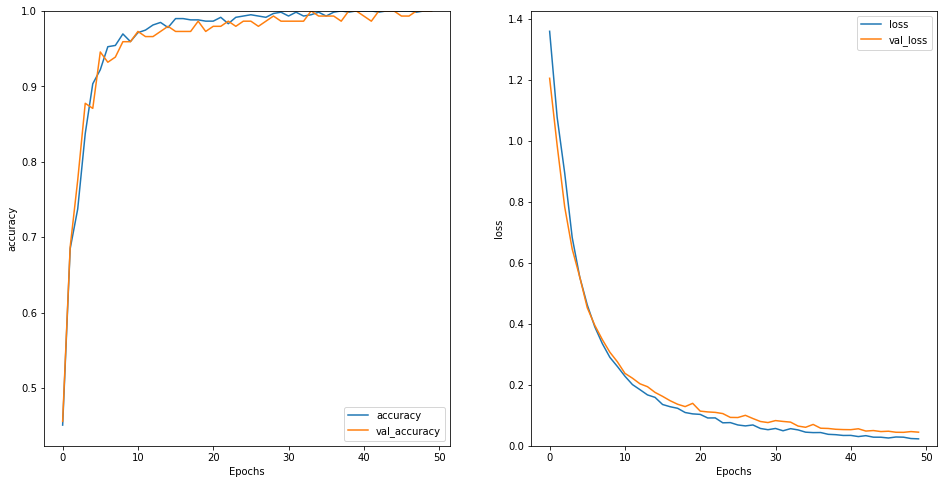

In [15]:
plt.figure(figsize=(16,8)) 
plt.subplot(1,2,1)
plot_graphs(history, 'accuracy')
plt.ylim(None,1)
plt.subplot(1,2,2)
plot_graphs(history, 'loss')
plt.ylim(0,None)